In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn as sk
%matplotlib inline

In [2]:
df = pd.read_csv('final.txt', sep=',', header=None)
df.columns = ['percent_h2s', 'flow_rate','cost']
df

percent_h2s  flow_rate   cost
0            2.0       4400  131.4
1            1.0       1500   54.1
2            9.0       4500  406.9
3            8.0       3250  308.0
4            0.0       4000    0.0
..           ...        ...    ...
99           9.0       5000  395.6
100         10.0       1250  246.8
101          9.0       1750  246.1
102         10.0       2000  238.5
103          4.0       1000  127.1

[104 rows x 3 columns]

In [3]:
df.columns

Index(['percent_h2s', 'flow_rate', 'cost'], dtype='object')

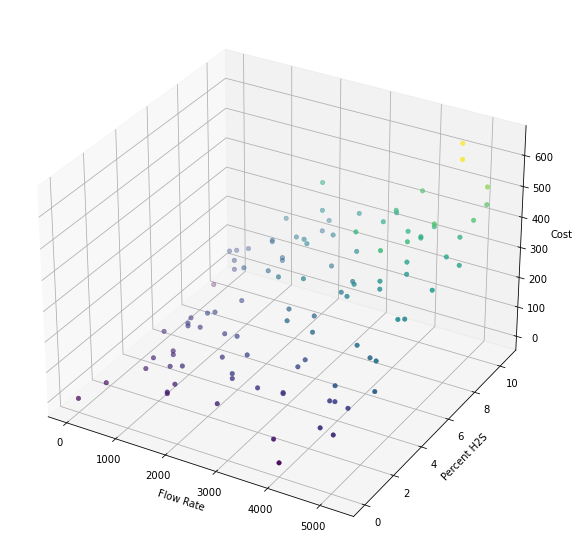

In [4]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Flow Rate")
ax.set_ylabel("Percent H2S")
ax.set_zlabel("Cost")
ax.scatter(df.flow_rate, df.percent_h2s, df.cost, c=df.cost, cmap='viridis', linewidth=0.5)
plt.show()

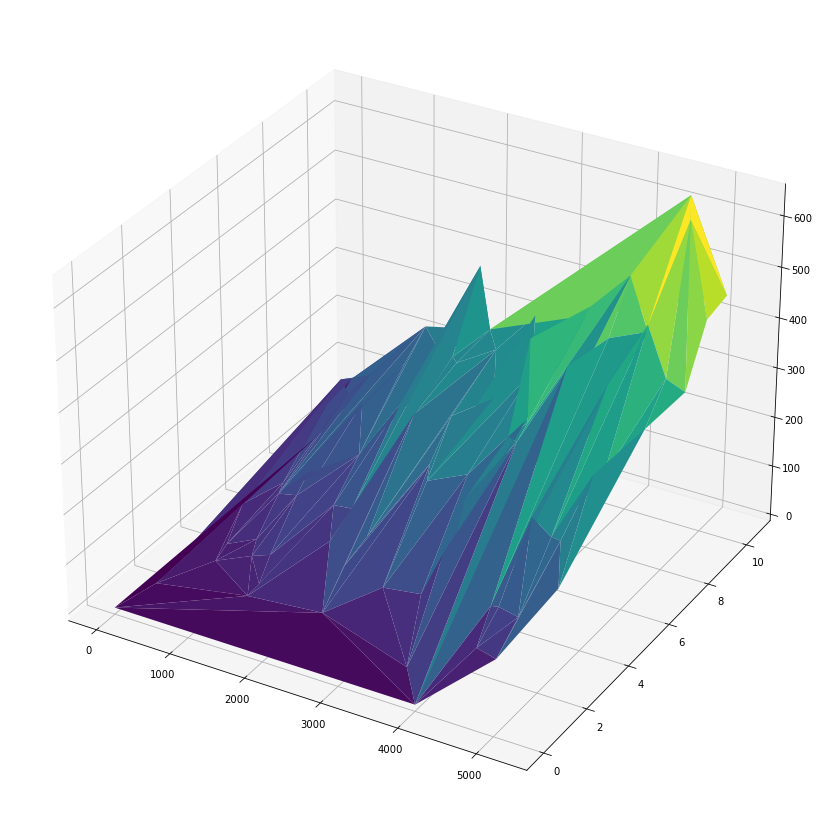

In [5]:
fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')
ax.plot_trisurf(df.flow_rate, df.percent_h2s, df.cost,
                cmap='viridis', edgecolor='none');

In [6]:
df.describe().T

count         mean          std  min       25%     50%       75%  \
percent_h2s  104.0     5.653846     3.058552  0.0     3.000     6.0     8.125   
flow_rate    104.0  2890.865385  1557.206305  0.0  1500.000  2875.0  4500.000   
cost         104.0   230.444231   141.370788  0.0   124.825   217.3   319.550   

                max  
percent_h2s    10.5  
flow_rate    5250.0  
cost          648.3

In [7]:
def feature_normalize(X, mean=np.zeros(1), std=np.zeros(1)):
    X = np.array(X)
    if len(mean.shape) == 1 or len(std.shape) == 1:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)

    X = (X - mean)/std
    return X, mean, std

In [8]:
X_norm, mu, sigma = feature_normalize(df[['flow_rate', 'percent_h2s']])

In [9]:
df['flow_rate_normalized'] = X_norm[:,0]
df['percent_h2s_normalized'] = X_norm[:,1]
df[['flow_rate_normalized', 'percent_h2s_normalized']].describe().T

count          mean  std       min      25%       50%  \
flow_rate_normalized    104.0 -1.024821e-16  1.0 -1.856443 -0.89318 -0.010188   
percent_h2s_normalized  104.0 -1.387779e-16  1.0 -1.848537 -0.86768  0.113176   

                             75%       max  
flow_rate_normalized    1.033347  1.514979  
percent_h2s_normalized  0.807949  1.584460

In [10]:
df

percent_h2s  flow_rate   cost  flow_rate_normalized  \
0            2.0       4400  131.4              0.969130   
1            1.0       1500   54.1             -0.893180   
2            9.0       4500  406.9              1.033347   
3            8.0       3250  308.0              0.230628   
4            0.0       4000    0.0              0.712259   
..           ...        ...    ...                   ...   
99           9.0       5000  395.6              1.354435   
100         10.0       1250  246.8             -1.053724   
101          9.0       1750  246.1             -0.732636   
102         10.0       2000  238.5             -0.572092   
103          4.0       1000  127.1             -1.214268   

     percent_h2s_normalized  
0                 -1.194633  
1                 -1.521585  
2                  1.094032  
3                  0.767080  
4                 -1.848537  
..                      ...  
99                 1.094032  
100                1.420984  
101                1.094032  
102                1.420984  
103               -0.540728  

[104 rows x 5 columns]

In [11]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    h = X.dot(theta)
    J = (1/(2*m)) * ((h-y).T.dot(h-y))
    return J

In [12]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(0, num_iters):
        h = X.dot(theta)
        diff_hy = h - y

        delta = (1/m) * (diff_hy.T.dot(X))
        theta = theta - (alpha * delta.T)
        J_history[i] = compute_cost(X, y, theta)

    return theta, J_history

In [13]:
m = df.shape[0]
X = np.hstack((np.ones((m,1)),X_norm))
y = np.array(df.cost.values).reshape(-1,1)
theta = np.zeros(shape=(X.shape[1],1))

In [14]:
alpha = [0.3, 0.1, 0.03, 0.01]
colors = ['b','r','g','c']
num_iters = 100

In [15]:
X
##### IMPORTANT: [___ , flowrate_normalized, percenth2s_normalized]

array([[ 1.        ,  0.96912953, -1.19463255],
       [ 1.        , -0.89317991, -1.52158461],
       [ 1.        ,  1.0333471 ,  1.09403191],
       [ 1.        ,  0.23062751,  0.76707985],
       [ 1.        ,  0.71225926, -1.84853668],
       [ 1.        , -1.05372383, -0.37725238],
       [ 1.        , -1.53535558,  1.09403191],
       [ 1.        ,  0.39117143,  0.44012778],
       [ 1.        ,  0.87280318,  0.11317571],
       [ 1.        , -1.53535558, -0.54072842],
       [ 1.        ,  0.39117143, -1.19463255],
       [ 1.        ,  1.19389101,  1.42098398],
       [ 1.        , -0.89317991, -1.19463255],
       [ 1.        , -1.53535558,  0.93055588],
       [ 1.        ,  1.51497885,  1.09403191],
       [ 1.        ,  0.39117143, -0.86768048],
       [ 1.        , -1.69589949, -1.52158461],
       [ 1.        , -0.53998329,  0.93055588],
       [ 1.        ,  1.0333471 ,  0.76707985],
       [ 1.        ,  0.87280318,  0.76707985],
       [ 1.        , -1.85644341, -1.848

In [16]:
# X[0][2]
feature_array=np.ones((104,10))
#feature_array = np.hstack((np.ones((m,1)),X_norm))

for i in range (0,103):
    for j in range(0,3):
        feature_array[i][j]=X[i][j]



for i in range (0,103):
    for j in range(3,5):
        feature_array[i][j]=feature_array[i][j-2]*feature_array[i][j-2]

for i in range (0,103):
    feature_array[i][5] = feature_array[i][1]*feature_array[i][2]
    
for i in range (0,103):
    for j in range(6,8):
        feature_array[i][j]=feature_array[i][j-5]*feature_array[i][j-5]*feature_array[i][j-5]

for i in range (0,103):
    feature_array[i][8]=feature_array[i][1]*feature_array[i][1]*feature_array[i][2]
    
for i in range (0,103):
    feature_array[i][9]=feature_array[i][1]*feature_array[i][2]*feature_array[i][2]



#####[___, flowrate, percent h2s, flowrate squared, percent h2s squared, flowrate*percent h2s
#     flowrate cubed, percent h2s cubed, flow^2*percent, percent^2*flow]
print(feature_array)

[[ 1.          0.96912953 -1.19463255 ... -1.70491616 -1.12201328
   1.38309022]
 [ 1.         -0.89317991 -1.52158461 ... -3.52280271 -1.21387508
  -2.06790774]
 [ 1.          1.0333471   1.09403191 ...  1.30945316  1.16821408
   1.23681916]
 ...
 [ 1.         -0.73263599  1.09403191 ...  1.30945316  0.58722764
  -0.87689628]
 [ 1.         -0.57209207  1.42098398 ...  2.86924439  0.46507291
  -1.15516572]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]


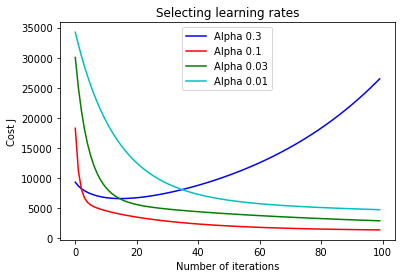

In [17]:
for i in range(0, len(alpha)):
    theta = np.zeros(shape=(10,1))
    theta, J_history = gradient_descent(feature_array, y, theta, alpha[i], num_iters)
    plt.plot(range(len(J_history)), J_history, colors[i], label='Alpha {}'.format(alpha[i]))
plt.xlabel('Number of iterations');
plt.ylabel('Cost J');
plt.title('Selecting learning rates');
plt.legend()
plt.show()

In [25]:
iterations = 500
alpha = 0.1
theta = np.zeros(shape=(10,1))
theta, _ = gradient_descent(feature_array, y, theta, alpha, iterations)

print('Theta found by gradient descent:')


#theta form is:
    
print(theta)

Theta found by gradient descent:
[[244.12497353]
 [ 76.2600165 ]
 [ 88.68246779]
 [ -7.18552393]
 [-10.97362896]
 [ 31.82796711]
 [  4.55199693]
 [  6.98045656]
 [ -7.66465394]
 [ -4.33643748]]


In [26]:
percent_h2s1= (2 - mu[1])/sigma[1]
flow_rate1  = (4400 - mu[0])/sigma[0]
#y_pred = theta[4] + theta[3]*percent_h2s1*percent_h2s1 + theta[2]*flow_rate1*flow_rate1 + theta[1]*percent_h2s1 + theta[0]*flow_rate1
y_pred = theta[0] + theta[1]*flow_rate1 + theta[2]*percent_h2s1 + theta[3]*flow_rate1*flow_rate1 + theta[4]*percent_h2s1*percent_h2s1 + theta[5]*flow_rate1*percent_h2s1 
+ theta[6]*flow_rate1*flow_rate1*flow_rate1 + theta[7]*percent_h2s1*percent_h2s1*percent_h2s1
+ theta[8]*flow_rate1*flow_rate1*percent_h2s1 + theta[7]*flow_rate1*percent_h2s1*percent_h2s1

f'Cost of a plant with flow rate 5250, percent h2s 10: {y_pred[0]}$'

# 2.0	4400	131.4

'Cost of a plant with flow rate 5250, percent h2s 10: 152.82918788246673$'

<Figure size 1080x1080 with 0 Axes>

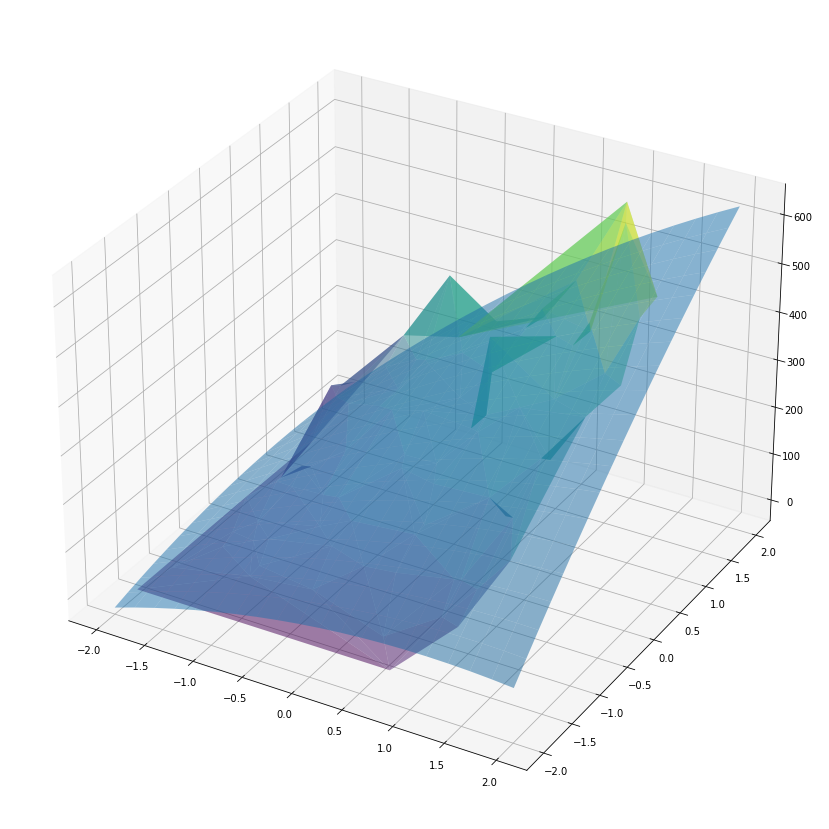

In [27]:


x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)

X,Y = np.meshgrid(x,y)
#Z = 230.44423077*X + 94.92117824*Y + 81.77285407
Z = theta[0] + theta[1]*Y + theta[2]*X + theta[3]*Y*Y + theta[4]*X*X + theta[5]*X*Y
+ theta[6]*Y*Y*Y + theta[7]*X*X*X + theta[8]*Y*Y*X + theta[9]*Y*X*X

fig = plt.figure(figsize=(15,15))
# ax = fig.(projection='3d')



fig1 = plt.figure(figsize=(15,15))

ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, Z, alpha=0.5)
ax.plot_trisurf(df.flow_rate_normalized, df.percent_h2s_normalized, df.cost,
                cmap='viridis', edgecolor='none', alpha=0.5);

# ax.scatter(df.flow_rate_normalized, df.percent_h2s_normalized, df.cost, cmap='viridis', color='red', linewidth=0.5);

In [28]:
expected_cost = df.cost
expected_cost

0      131.4
1       54.1
2      406.9
3      308.0
4        0.0
       ...  
99     395.6
100    246.8
101    246.1
102    238.5
103    127.1
Name: cost, Length: 104, dtype: float64

In [29]:
predicted_cost = [None] * 104
    
for i in range(104):
    percent_h2s1 = (df.percent_h2s[i] - mu[1])/sigma[1]
    flow_rate1 = (df.flow_rate[i] - mu[0])/sigma[0]    
    temp = theta[0] + theta[1]*flow_rate1 + theta[2]*percent_h2s1 + theta[3]*flow_rate1*flow_rate1 + theta[4]*percent_h2s1*percent_h2s1 + theta[5]*flow_rate1*percent_h2s1 
    + theta[6]*flow_rate1*flow_rate1*flow_rate1 + theta[7]*percent_h2s1*percent_h2s1*percent_h2s1
    + theta[8]*flow_rate1*flow_rate1*percent_h2s1 + theta[7]*flow_rate1*percent_h2s1*percent_h2s1    #print(df.percent_h2s[i],percent_h2s1," ",df.flow_rate[i],flow_rate1," ",temp, df.cost[i])
    
    predicted_cost[i]=temp
    
predicted_cost

[array([152.82918788]),
 array([53.19018119]),
 array([435.12432698]),
 array([328.53064112]),
 array([51.46002589]),
 array([133.42446216]),
 array([140.52489793]),
 array([315.24178365]),
 array([318.25124513]),
 array([85.36240581]),
 array([136.37887276]),
 array([482.78366048]),
 array([82.63585242]),
 array([137.64802287]),
 array([479.8051943]),
 array([176.84367566]),
 array([15.91592648]),
 array([257.87915625]),
 array([402.05356522]),
 array([388.08978921]),
 array([-14.41798775]),
 array([312.51646833]),
 array([515.54181146]),
 array([128.73490533]),
 array([153.70446234]),
 array([76.34230561]),
 array([282.25917297]),
 array([428.869904]),
 array([218.32345352]),
 array([122.76285591]),
 array([358.51868067]),
 array([366.6366931]),
 array([154.36067715]),
 array([110.66644362]),
 array([163.95778415]),
 array([228.07978675]),
 array([211.61788731]),
 array([104.86714288]),
 array([230.27744458]),
 array([106.7659277]),
 array([430.86840095]),
 array([276.12991492]),
 ar

In [30]:
#Calculating mean absolute error
temp=0
for i in range(104):
    temp+= abs(predicted_cost[i]-df.cost[i])

error=temp/104
error

array([28.08779274])

In [34]:
#Calculating mean absolute error by percentage
temp=0
for i in range(104):
    if(df.cost[i]==0):
        continue
    temp+=100*(   abs(predicted_cost[i]-df.cost[i])  /   (df.cost[i])  )

error=temp/104
error

array([12.26739828])